# DSDBA Lab

## Assignment-2 : Data Wranngling_2

### Problem Statement : 

Consider the “Academic performance” dataset of students (xAPI-
Edu-Data.csv) and perform the following operations using Python.

1.Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2.Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3.Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.



In [1]:
# importing the required library and reading the dataset

import pandas as pd
df=pd.read_csv("xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,NaN,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


In [2]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,460.000000,476.000000,469.000000,480.000000
mean,46.708696,54.701681,37.897655,43.283333
std,30.919425,33.111157,26.673520,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.000000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     470 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  465 non-null    object 
 9   raisedhands               460 non-null    float64
 10  VisITedResources          476 non-null    float64
 11  AnnouncementsView         469 non-null    float64
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

# Dealing with missing values and inconsistencies



## Checking number of missing (null) values in each columns of the dataset 

In [4]:
missing_values=df.isnull().sum()
print(missing_values)

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                       10
Semester                     0
Relation                    15
raisedhands                 20
VisITedResources             4
AnnouncementsView           11
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     5
StudentAbsenceDays           5
Class                       13
dtype: int64


In [5]:
miss_val_perc = (missing_values * 100) / len(df)
print(miss_val_perc)

gender                      0.000000
NationalITy                 0.000000
PlaceofBirth                0.000000
StageID                     0.000000
GradeID                     0.000000
SectionID                   0.000000
Topic                       2.083333
Semester                    0.000000
Relation                    3.125000
raisedhands                 4.166667
VisITedResources            0.833333
AnnouncementsView           2.291667
Discussion                  0.000000
ParentAnsweringSurvey       0.000000
ParentschoolSatisfaction    1.041667
StudentAbsenceDays          1.041667
Class                       2.708333
dtype: float64


In [6]:
import numpy as np

### Displaying the numerical data types from the dataset 

In [7]:
numerical_data = df.select_dtypes(include=np.number)
print(numerical_data)

     raisedhands  VisITedResources  AnnouncementsView  Discussion
0           15.0              16.0                2.0          20
1           20.0              20.0                3.0          25
2           10.0               7.0                0.0          30
3           30.0               NaN                5.0          35
4            NaN              50.0               12.0          50
..           ...               ...                ...         ...
475          5.0               4.0                5.0           8
476         50.0              77.0               14.0          28
477         55.0              74.0               25.0          29
478         30.0              17.0               14.0          57
479         35.0              14.0               23.0          62

[480 rows x 4 columns]


#### From above , raisedhands , visitedresources , AnnouncementsView , Discussion are numerical data types having the missing values 20,4,11 and 0 respectively.

In [10]:
# median imputation for 'raisedhands'

df['raisedhands']=df['raisedhands'].replace(np.NaN,df['raisedhands'].median())
df['raisedhands'].isnull().sum()

0

In [9]:
# Filling the null values by 0 in 'VisitedResources' 

df['VisITedResources']=df['VisITedResources'].fillna(0)
df['VisITedResources'].isnull().sum()

0

In [11]:
# mean imputation for 'AnnouncemntsView'

df['AnnouncementsView']=df['AnnouncementsView'].replace(np.NaN,df['AnnouncementsView'].mean())
df['AnnouncementsView'].isnull().sum()

0

### Displaying the categorical data types from the dataset 



In [13]:
categorical_data = df.select_dtypes(exclude=np.number)
print(categorical_data)

    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation ParentAnsweringSurvey  \
0           IT        F   Father                   Yes   
1           IT        F   Fathe

#### From above, 'Topic' , 'Relation' , 'ParentschoolSatisfaction' , 'StudentAbsenceDays', 'Class'  are the categorical data types having some null values.


#### So we replace the missing values by using simple imputer library and using the strategy as 'most_frequent ' for the  'Topic', 'ParentschoolSatisfaction' , 'StudentAbsenceDays', 'Class' columns

In [14]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
impute.fit(df[['Topic']])
df['Topic'] = impute.transform(df[['Topic']])
df['Topic'].isnull().sum()


0

In [15]:
impute1 = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
impute1.fit(df[['ParentschoolSatisfaction']])
df['ParentschoolSatisfaction'] = impute1.transform(df[['ParentschoolSatisfaction']])
df['ParentschoolSatisfaction'].isnull().sum()

0

In [16]:
impute2 = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
impute2.fit(df[['Class']])
df['Class'] = impute2.transform(df[['Class']])
df['Class'].isnull().sum()

0

In [17]:
df['StudentAbsenceDays'].unique()

array(['Under-7', 'Above-7', nan], dtype=object)

In [18]:
df['StudentAbsenceDays'].value_counts()

Under-7    284
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [19]:
impute3 = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
impute3.fit(df[['StudentAbsenceDays']])
df['StudentAbsenceDays'] = impute3.transform(df[['StudentAbsenceDays']])
df['StudentAbsenceDays'].isnull().sum()

0

In [20]:
# as we cannot asign relation as default so named it as missing for the not available missing value

imputer = SimpleImputer(strategy='constant',missing_values=np.NaN,fill_value='missing')
imputer.fit(df[['Relation']])
df['Relation'] = imputer.transform(df[['Relation']])
df['Relation'].isnull().sum()

0

In [21]:
missing_values_new=df.isnull().sum()
print(missing_values_new)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


# Outlier Detection

In [ ]:
numerical_data = df.select_dtypes(include=np.number)
print(numerical_data)

     raisedhands  VisITedResources  AnnouncementsView  Discussion
0           15.0              16.0                2.0          20
1           20.0              20.0                3.0          25
2           10.0               7.0                0.0          30
3           30.0               0.0                5.0          35
4           50.0              50.0               12.0          50
..           ...               ...                ...         ...
475          5.0               4.0                5.0           8
476         50.0              77.0               14.0          28
477         55.0              74.0               25.0          29
478         30.0              17.0               14.0          57
479         35.0              14.0               23.0          62

[480 rows x 4 columns]


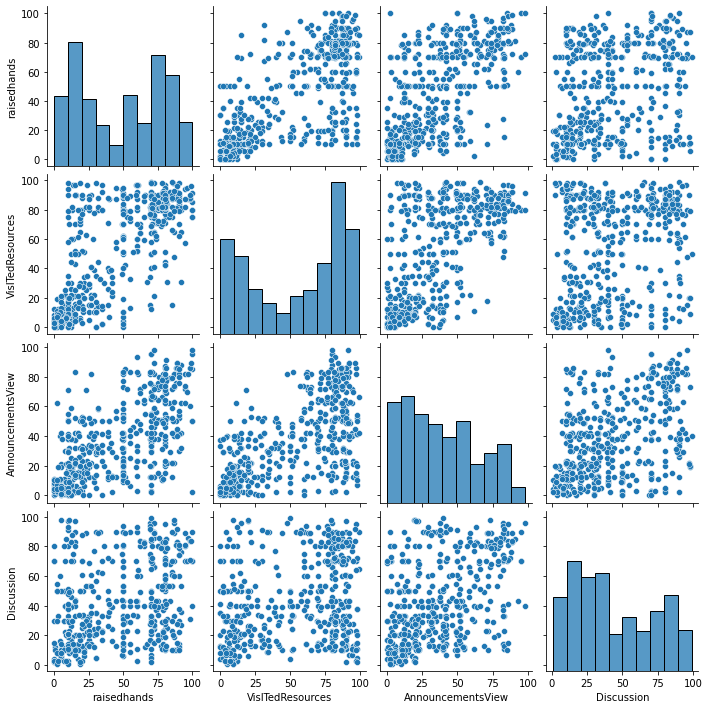

In [ ]:
import seaborn as sns
sns.pairplot(numerical_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9fbeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca0c1a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9fbd48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca0c478>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca0c5e0>],
 'means': []}

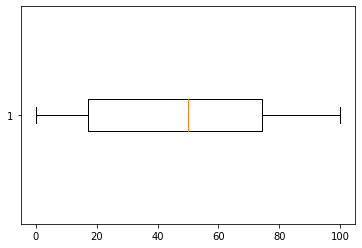

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(df["raisedhands"], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca31f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca41268>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca31e08>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca41538>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca416a0>],
 'means': []}

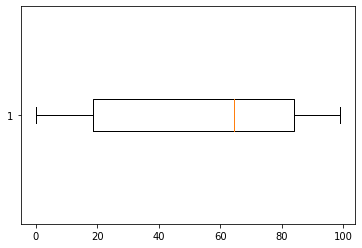

In [26]:
plt.boxplot(df["VisITedResources"], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca740d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca74370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca65f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca74640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca747a8>],
 'means': []}

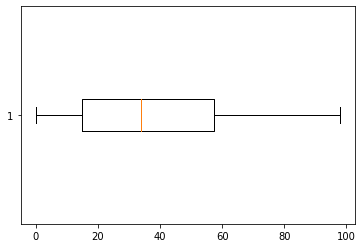

In [27]:
plt.boxplot(df["AnnouncementsView"], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1caa9118>,
 'caps': [<matplotlib.lines.Line2D at 0x1caa93e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca99f88>],
 'medians': [<matplotlib.lines.Line2D at 0x1caa96b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1caa9820>],
 'means': []}

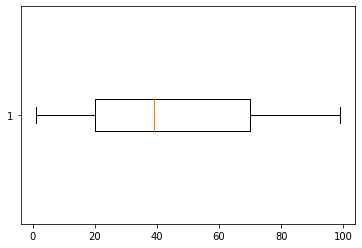

In [28]:
plt.boxplot(df["Discussion"], vert=False)

### From the above figures it shows that there are no outliers

### So creating copy and demonstrating the outliers handling.

In [29]:
df_copy = df.copy(deep=True)
df_copy

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,0.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,50.0,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


<ipython-input-31-5cbd9bd87111>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["raisedhands"][300] = 300.0
<ipython-input-31-5cbd9bd87111>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["raisedhands"][400] = 400.0


Text(0.5, 1.0, 'Detecting outliers using Boxplot')

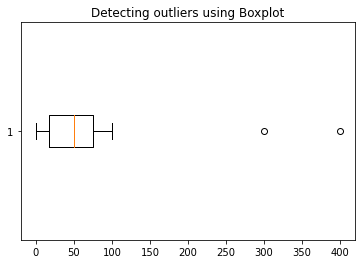

In [31]:
# we manually det an outer range value and thus demonstrate

df_copy["raisedhands"][300] = 300.0
df_copy["raisedhands"][400] = 400.0

plt.boxplot(df_copy["raisedhands"], vert=False)
plt.title("Detecting outliers using Boxplot")

### Now we see outliers exeeding 100 so we now use mean imputation to handle these outliers

In [35]:
df_copy[df_copy["raisedhands"] > 100]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
300,M,Jordan,Jordan,lowerlevel,G-04,A,Science,F,Father,300.0,12.0,20.0,13,No,Bad,Above-7,L
400,M,Jordan,Jordan,MiddleSchool,G-07,A,Biology,F,Father,400.0,71.0,40.0,26,No,Good,Above-7,M


In [38]:
df_copy[df_copy["raisedhands"] > 100] = df_copy["raisedhands"].mean()

In [39]:
df_copy[df_copy["raisedhands"] > 100]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class


{'whiskers': [<matplotlib.lines.Line2D at 0x1cb6de38>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb7d0e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb6dcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb7d370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb7d460>],
 'means': []}

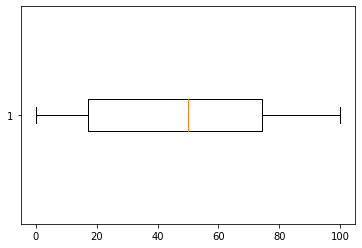

In [41]:
plt.boxplot(df_copy["raisedhands"], vert=False)

# Data Transformation

In [42]:
categorical_data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


## Replacement of Categorical Data with a Number

### Replace the entries in the ParentsschoolSatisfaction column. Replace Good with 1 and Bad with 0 using the replace() function:

In [43]:
df.ParentschoolSatisfaction.value_counts()

Good    296
Bad     184
Name: ParentschoolSatisfaction, dtype: int64

In [47]:
df.ParentschoolSatisfaction.replace({"Bad": 0, "Good": 1}, inplace=True)

In [48]:
df.ParentschoolSatisfaction

0      1
1      1
2      0
3      0
4      0
      ..
475    0
476    0
477    0
478    0
479    0
Name: ParentschoolSatisfaction, Length: 480, dtype: int64

In [49]:
df.ParentschoolSatisfaction.value_counts()

1    296
0    184
Name: ParentschoolSatisfaction, dtype: int64

### Replace the entries in the ParentAnsweringSurvey column. Replace Yes with 1 and No with -1 using the replace() function: 

In [50]:
df.ParentAnsweringSurvey.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [51]:
df.ParentAnsweringSurvey.replace({"Yes": 1, "No": -1}, inplace=True)

In [52]:
df.ParentAnsweringSurvey.value_counts()

 1    270
-1    210
Name: ParentAnsweringSurvey, dtype: int64

In [53]:
df.ParentAnsweringSurvey

0      1
1      1
2     -1
3     -1
4     -1
      ..
475   -1
476   -1
477   -1
478   -1
479   -1
Name: ParentAnsweringSurvey, Length: 480, dtype: int64